# Monthly SMA

The Monthly SMA.

Entry and Exit Points  
Entry (Buy Signal): Buy when the S&P 500 closes above the 10-month moving  
average at the end of the month.

Exit (Sell Signal): Sell when the S&P 500 closes below the 10-month moving  
average at the end of the month.  

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf
import strategy

# Format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'ES=F'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()

In [4]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'monthly_sma' : 10
}

Run Strategy

In [5]:
s = strategy.Strategy(symbol, capital, start, end, options)
s.run()
s.ts

/home/fja0568/src/pinkfish/examples/095.monthly-sma/strategy.py:68: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = self.ts["close"].resample('M').last()  # 'M' ensures robustness


,close,adj_close,volume,monthly_sma,last_dotm
date,,,,,
1928-10-01,21.36,21.36,0,19.21,False
1928-10-02,21.26,21.26,0,19.21,False
1928-10-03,21.19,21.19,0,19.21,False
1928-10-04,21.26,21.26,0,19.21,False
1928-10-05,21.22,21.22,0,19.21,False
...,...,...,...,...,...
2025-01-24,6101.24,6101.24,4214250000,5558.07,False
2025-01-27,6012.28,6012.28,5198750000,5558.07,False
2025-01-28,6067.70,6067.70,4473640000,5558.07,False


View logs

In [6]:
s.tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
63,2015-10-30,2079.36,2015-12-31,2043.94,-35.42,-32232.35,910,1850107.72,LONG,^GSPC
64,2016-03-31,2059.74,2018-10-31,2711.74,652.00,588756.00,903,2438863.72,LONG,^GSPC
65,2018-11-30,2760.17,2018-12-31,2506.85,-253.32,-224694.68,887,2214169.04,LONG,^GSPC
66,2019-02-28,2784.49,2019-05-31,2752.06,-32.43,-25879.09,798,2188289.95,LONG,^GSPC
67,2019-06-28,2941.76,2020-02-28,2954.22,12.46,9307.59,747,2197597.54,LONG,^GSPC
68,2020-05-29,3044.31,2022-02-28,4373.94,1329.63,963981.67,725,3161579.21,LONG,^GSPC
69,2022-03-31,4530.41,2022-04-29,4131.93,-398.48,-278935.99,700,2882643.22,LONG,^GSPC
70,2022-11-30,4080.11,2022-12-30,3839.50,-240.61,-170351.96,708,2712291.26,LONG,^GSPC
71,2023-01-31,4076.60,2023-10-31,4193.80,117.20,78172.20,667,2790463.47,LONG,^GSPC
72,2023-11-30,4567.80,2025-01-30,6071.17,1503.37,921565.88,613,3712029.35,LONG,^GSPC


In [7]:
s.dbal.tail(10)

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2025-01-16,3639991.51,3639991.51,3639991.51,613,402.19,1.00,-
2025-01-17,3676354.86,3676354.86,3676354.86,613,402.19,1.00,-
2025-01-21,3708586.45,3708586.45,3708586.45,613,402.19,1.00,-
2025-01-22,3731347.07,3731347.07,3731347.07,613,402.19,1.00,-
2025-01-23,3751171.39,3751171.39,3751171.39,613,402.19,1.00,-
2025-01-24,3740462.45,3740462.45,3740462.45,613,402.19,1.00,-
2025-01-27,3685929.70,3685929.70,3685929.70,613,402.19,1.00,-
2025-01-28,3719902.41,3719902.41,3719902.41,613,402.19,1.00,-
2025-01-29,3702499.25,3702499.25,3702499.25,613,402.19,1.00,-


Display all available stats

In [8]:
pf.print_full(s.stats)

start                                                   1928-10-01
end                                                     2025-01-30
beginning_balance                                            10000
ending_balance                                          3722029.35
total_net_profit                                        3712029.35
gross_profit                                            4673899.41
gross_loss                                              -961870.06
profit_factor                                                 4.86
return_on_initial_capital                                 37120.29
annual_return_rate                                            6.34
trading_period                           96 years 3 months 29 days
pct_time_in_market                                           68.10
margin                                                           1
avg_leverage                                                  1.00
max_leverage                                                  

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [9]:
benchmark = pf.Benchmark(symbol, s.capital, s.start, s.end, use_adj=s.options['use_adj'])
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

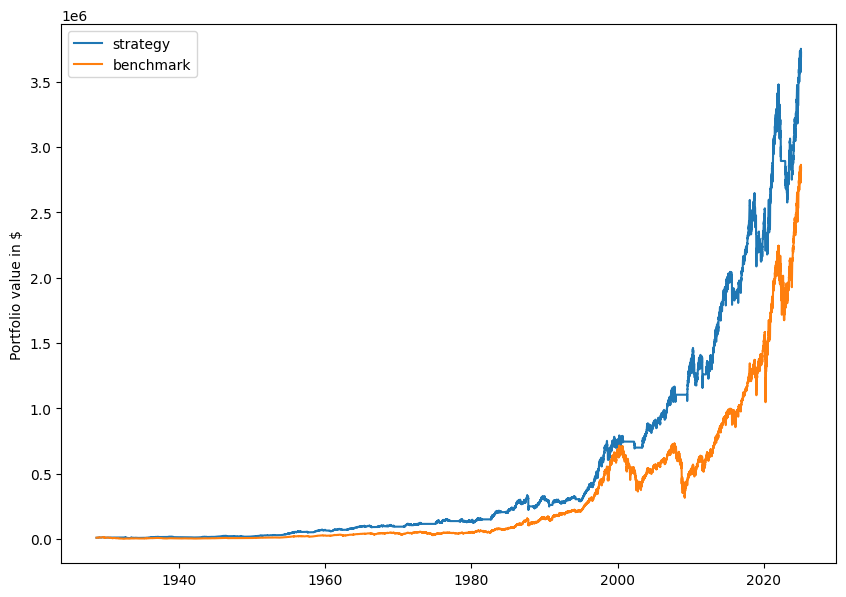

In [10]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Plot Trades

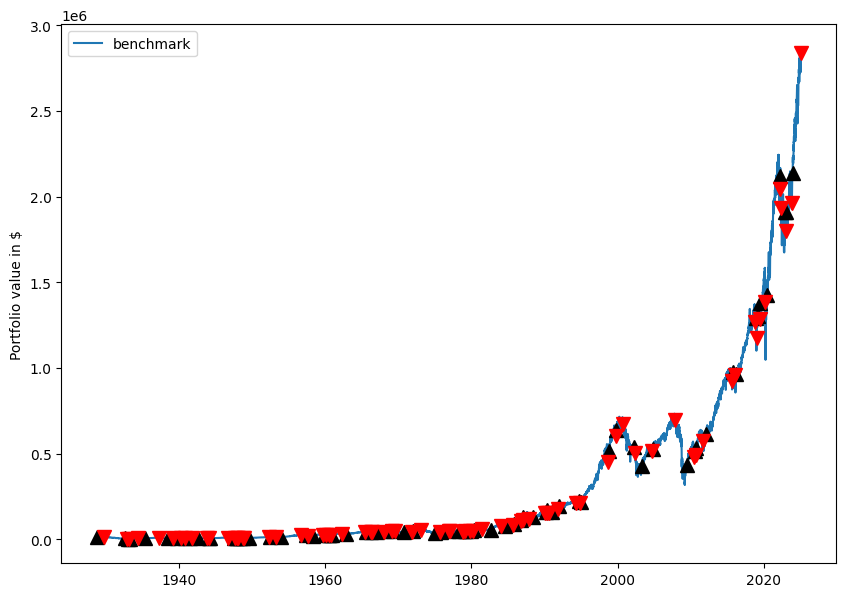

In [11]:
pf.plot_trades(s.dbal, benchmark=benchmark.dbal)
# benchmark.dbal[benchmark.dbal.isna().any(axis=1)]

In [12]:
print('trading period:  {} to {}'.format(s.stats['start'], s.stats['end']))
df = pf.summary(s.stats, benchmark.stats, metrics=pf.currency_metrics)
df

trading period:  1928-10-01 to 2025-01-30


,strategy,benchmark
beginning_balance,"$10,000.00","$10,000.00"
ending_balance,"$3,722,029.35","$2,841,311.04"
total_net_profit,"$3,712,029.35","$2,831,311.04"
gross_profit,"$4,673,899.41","$2,831,311.04"
gross_loss,"-$961,870.06",$0.00


Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,6.34,6.04
max_closed_out_drawdown,-52.69,-86.17
annualized_return_over_max_drawdown,0.12,0.07
best_month,22.41,61.42
worst_month,-31.84,-42.18
sharpe_ratio,0.54,0.41
sortino_ratio,0.54,0.51
monthly_std,3.41,5.30
annual_std,13.70,19.93


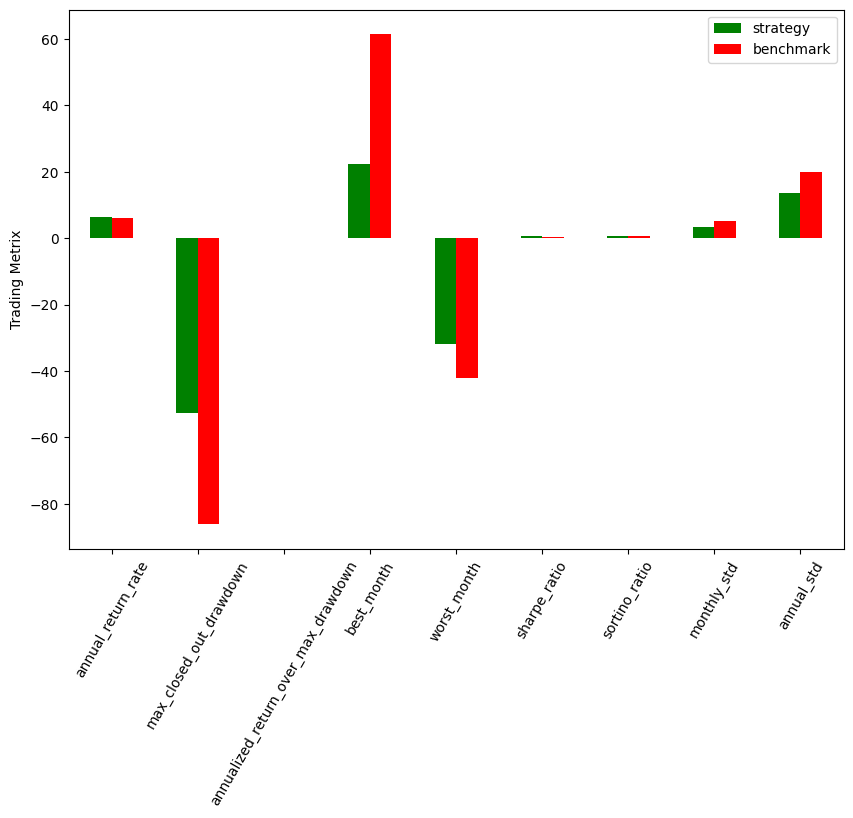

In [13]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Print the raw transaction log

In [14]:
pd.set_option('display.max_rows', len(s.rlog))
s.rlog

,date,seq_num,price,shares,entry_exit,direction,symbol
0,1928-10-31,0,21.68,461,entry,LONG,^GSPC
1,1929-10-31,1,24.15,461,exit,LONG,^GSPC
2,1932-08-31,2,8.39,1327,entry,LONG,^GSPC
3,1932-11-30,3,6.55,1327,exit,LONG,^GSPC
4,1932-12-30,4,6.92,1256,entry,LONG,^GSPC
5,1933-02-28,5,5.66,1256,exit,LONG,^GSPC
6,1933-04-28,6,7.83,908,entry,LONG,^GSPC
7,1934-05-31,7,9.61,908,exit,LONG,^GSPC
8,1935-04-30,8,9.28,940,entry,LONG,^GSPC
9,1937-04-30,9,16.43,940,exit,LONG,^GSPC
